## **1. Pronalazenje supervised problema na kaggle/2. Opis problema**
# Izabran dataset [Water Quality](https://www.kaggle.com/datasets/adityakadiwal/water-potability) koji sadrzi podatke o 9 metrika koje se mogu koristiti za utvrdjivanje da li je voda pitka.

Svrha resavanja je da se napravi sistem masinskog ucenja koji moze predvideti da li je voda bezbedna za pice , na osnovu 9 ili manje atributa.

Ovaj problem se resava pomocu atributa:Ph vrednost,Tvrdoca vode,Ukupna kolicina rastvorene cvrste materija,Hloramini,Sulfati,Provodljivost,Kolicina organskog ugljenika,Trihalometani i Zamucenost.<br>
Atributi su detaljnije objasnjeni na sajtu

In [ ]:
import pandas as pd 
import numpy as np
from google.colab import drive


drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/
!ls

/content/drive/MyDrive
 15mindata.csv	   272A3283.jpg
 2522.pdf	   272A3285.jpg
 272A3108.jpg	   272A3287aaaa.jpg
 272A3109.jpg	   272A3287.jpg
 272A3111.jpg	   272A3288.jpg
 272A3112-2.jpg    272A3289.jpg
 272A3113.jpg	   272A3290.jpg
 272A3114.jpg	   272A3290ss.jpg
 272A3123.jpg	   272A3292.jpg
 272A3124a.jpg	   272A3294.jpg
 272A3124.jpg	   272A3296.jpg
 272A3126.jpg	   272A3297.jpg
 272A3127.jpg	   272A3298.jpg
 272A3130.jpg	   272A3299aaa.jpg
 272A3131.jpg	   272A3299.jpg
 272A3133.jpg	   272A3300.jpg
 272A3134.jpg	   272A3305.jpg
 272A3137a.jpg	   272A3316.jpg
 272A3137.jpg	   272A3324.jpg
 272A3138.jpg	   272A3325.jpg
 272A3140.jpg	   272A3326.jpg
 272A3146.jpg	   272A3328.jpg
 272A3147-3.jpg    272A3329.jpg
 272A3147.jpg	   272A3330.jpg
 272A3149.jpg	   272A3332.jpg
 272A3151-2.jpg    272A3334.jpg
 272A3152.jpg	   272A3335.jpg
 272A3155.jpg	   272A3338.jpg
 272A3156.jpg	   272A3340.jpg
 272A3157.jpg	   272A3342.jpg
 272A3158.jpg	   272A3345.jpg
 272A3159.jpg	   272A3347.jpg
 27

In [ ]:
data=pd.read_csv("water_potability.csv")
# data.shape
data.head(-11)
# data.iloc[18:20,:]
# data.dtypes
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

## **3. Sredjivanje Podataka**
Posto u setu podataka ne postoje vrednosti za sve atribute potrebno je resiti taj problem.<br>
Resio sam ga tako sto sam nepostojece vrednosti zamenio sa srednjom vrednoscu za taj atribut.

<Figure size 720x432 with 0 Axes>

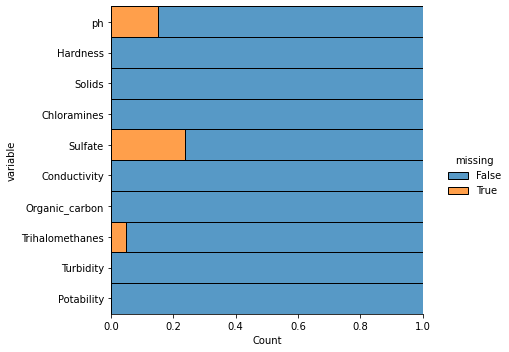

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


In [ ]:
y=data["Potability"]
X=data.drop('Potability',axis=1)
# data.head(-20)
# X["Trihalomethanes"].head()
# X["Trihalomethanes"].median()
#Uocavam da je mala razlika izmedju proseka vrednosti atributa pijace i nepijace vode.
#Na osnovu toga zakljucujem da mogu da zamenim NaN vrednosti sa sredjom vrednoscu tih atributa
print(data[data["Potability"]==1]["ph"].mean())
print(data[data["Potability"]==0]["ph"].mean())
print(data[data["Potability"]==1]["Sulfate"].mean())
print(data[data["Potability"]==0]["Sulfate"].mean())
print(data[data["Potability"]==1]["Trihalomethanes"].mean())
print(data[data["Potability"]==0]["Trihalomethanes"].mean())
print(data[data["Potability"]==1]["Hardness"].mean())
X


7.073783295381195
7.085378435983533
332.56699023366536
334.5642895786884
66.53968374070118
66.3035552730608
195.80074426259281


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658


In [ ]:
X["ph"]=np.nan_to_num(X["ph"],nan=X["ph"].mean())
X["Sulfate"]=np.nan_to_num(X["Sulfate"],nan=X["Sulfate"].mean())
X["Trihalomethanes"]=np.nan_to_num(X["Trihalomethanes"],nan=X["Trihalomethanes"].mean())
np.isnan(X).any()


ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14)


In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# print(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


lr=LogisticRegression()
lr.fit(X_train,y_train)

rc=RidgeClassifier()
rc.fit(X_train,y_train)

adaBoost=AdaBoostClassifier(n_estimators=100)
adaBoost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_lr_prob=lr.predict_proba(X_test)
# y_pred_lr
y_pred_ab=adaBoost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix

acc_lr_test=accuracy_score(y_test,y_pred_lr)
roc_lr_test=roc_auc_score(y_test,y_pred_lr_prob[:,1])
prec_lr_test=precision_score(y_test,y_pred_lr)
recall_lr_test=recall_score(y_test,y_pred_lr)

print("ACC:{} \nAUC:{} \nPrecision:{} \nRecall{} ".format(acc_lr_test,roc_lr_test,prec_lr_test,recall_lr_test))


ACC:0.5975609756097561 
AUC:0.5366419294990723 
Precision:0.0 
Recall0.0 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc_ab_test=accuracy_score(y_test,y_pred_ab)
acc_ab_test

0.5823170731707317

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


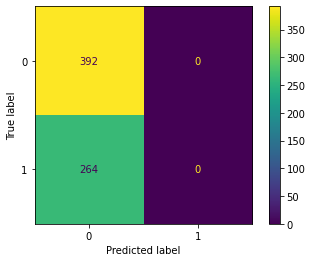

In [ ]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
params=[{'C':[0.001,0.01,0.1,1],'penalty':['none','l1','l2']}]
logreg=LogisticRegression(class_weight='balanced',solver='saga')
grid=GridSearchCV(logreg,params,cv=3,scoring='roc_auc')
grid.fit(X_train,y_train)
params2=[{'alpha':[0.001,0.01,0.1,1]}]
ridgereg=RidgeClassifier()
grid2=GridSearchCV(ridgereg,params2,cv=3,scoring='roc_auc')
grid2.fit(X_train,y_train)

print("Najbolje vrednosti parametara: ",grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print("Najbolje vrednosti parametara: ",grid2.best_params_)
print(grid2.cv_results_['mean_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Najbolje vrednosti parametara:  {'C': 0.001, 'penalty': 'l1'}
[0.48147296 0.5        0.48178955 0.48147112 0.5        0.48152821
 0.48146744 0.48737145 0.48150058 0.4814748  0.4818894  0.48147479]
Najbolje vrednosti parametara:  {'alpha': 0.001}
[0.48110815 0.48110815 0.4811063  0.48109525]


0.5975609756097561
0.5975609756097561


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


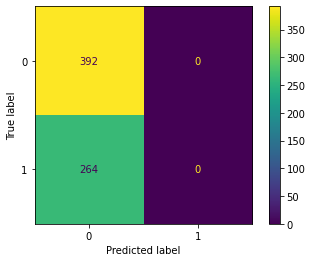

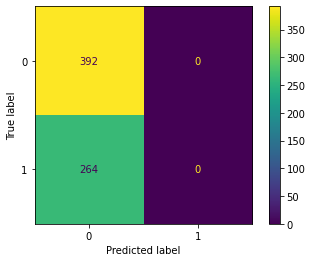

In [ ]:
grid_test=grid.predict(X_test)
grid_test_proba=grid.predict_proba(X_test)
acc_lr_test=accuracy_score(y_test,grid_test)
print(acc_lr_test)
plot_confusion_matrix(grid,X_test,y_test)

grid2_test=grid2.predict(X_test)
# grid2_test_proba=grid2.predict_proba(X_test)
acc_lr_test2=accuracy_score(y_test,grid2_test)
print(acc_lr_test2)
plot_confusion_matrix(grid2,X_test,y_test)

## **4. Eksploracija Analiza**
## **3.1 Ponovno sredjivanje podataka**
# Kao sto mozemo videti ovaj sistem ima jako lose preformanse,uzrok toga je to sto je dataset nasumican i lose je obelezen.
Iako ovaj set podataka ima skoro 1000 lajkova i dobro je obelezen od strane Kaggle-a podaci o pitkosti vode su netacni po standardima Svetske Zdravstvene Organizacije.<br>
Dole sam pokazao da po svim parametrima i pitka i nepitka voda ima slicne vrednosti i prati normalnu raspodelu sto u ovom slucaju svakako ne bismo ocekivali.
Sa velikom sigurnoscu tvrdim da je ovaj dataset nasumicno generisan.

Posto zelim da zavrsim ovaj projekat podatke cu kategorizovati u odnosu na preporucene vrednosti za pijacu vodu i onda cu nad tim podacima istrenirati mrezu.
Ovo su ogranicenja , ogranicenje za kolicinu cvrste materije nije potrebno jer se ona moze piti i u ekstremnim granicama.

6.5 < ph < 9 |
Solids < 1000 |
Chloramines! < 4 |
Sulfate < 500 |
Conductivity < 400 |
Organic_carbon! < 4 |
Trihalomethanes < 80 |
Turbidity < 5 <br>

Posto nijedan primer u setu ne odgovara svim ovim ogranicenjima moracu da izmenim vrednosti kako bih imao instance pitke vode.
To radim tako sto cu Solids(Kolicinu cvrste materije) podeliti sa 25,kolicinu kloramina cu podeliti sa 2 a kolicinu organskog ugljenika cu podeliti sa 4.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


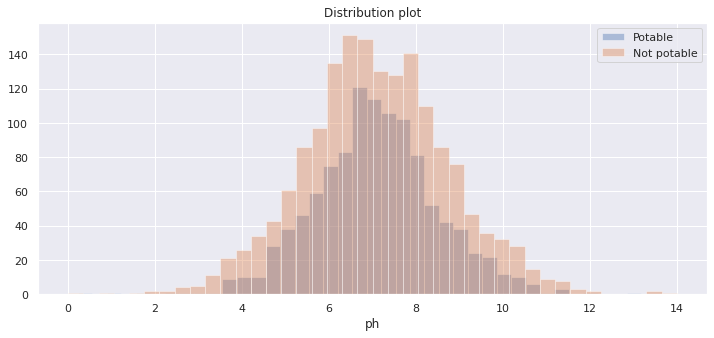

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['ph'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['ph'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


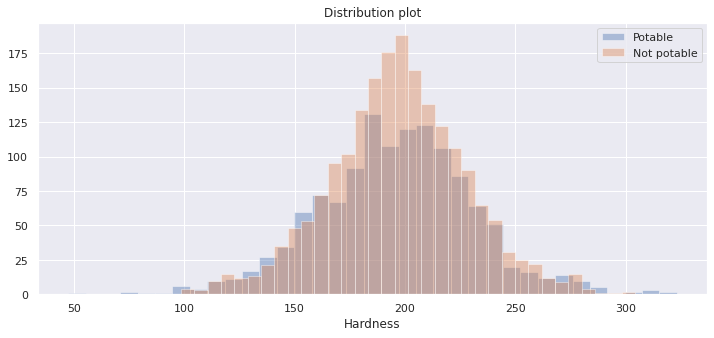

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Hardness'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Hardness'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


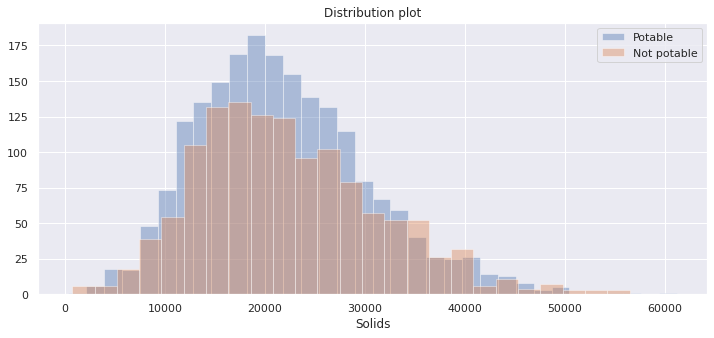

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 0]['Solids'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 1]['Solids'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


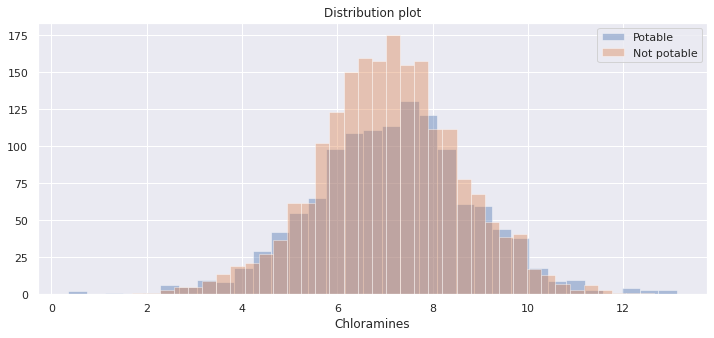

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Chloramines'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Chloramines'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


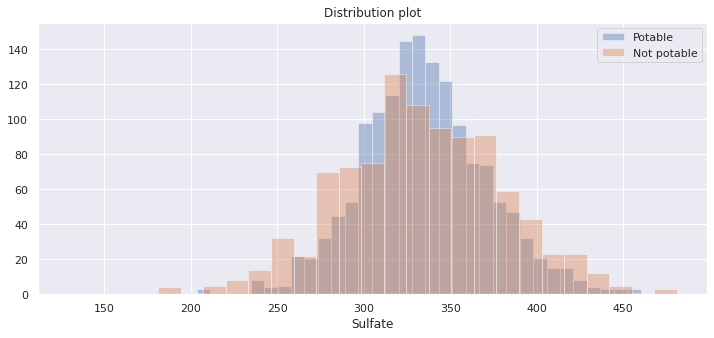

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 0]['Sulfate'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 1]['Sulfate'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


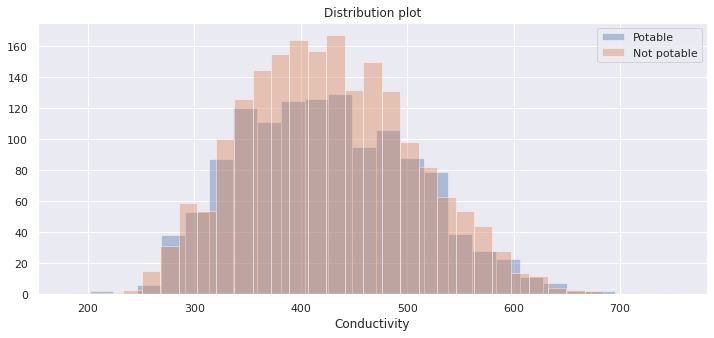

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Conductivity'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Conductivity'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


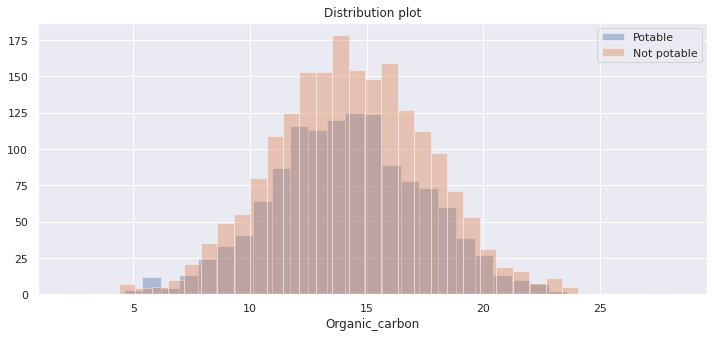

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Organic_carbon'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Organic_carbon'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


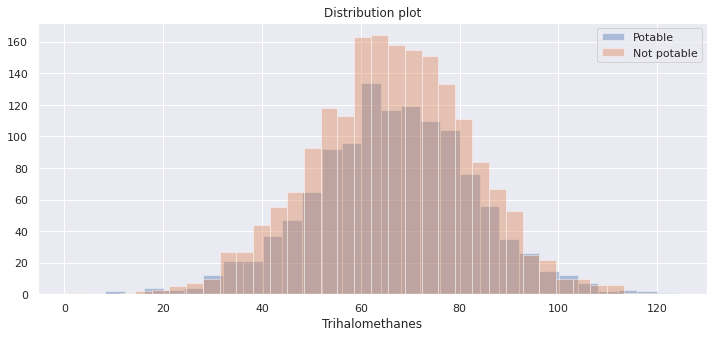

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Trihalomethanes'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Trihalomethanes'],  kde=False, label="Not potable")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


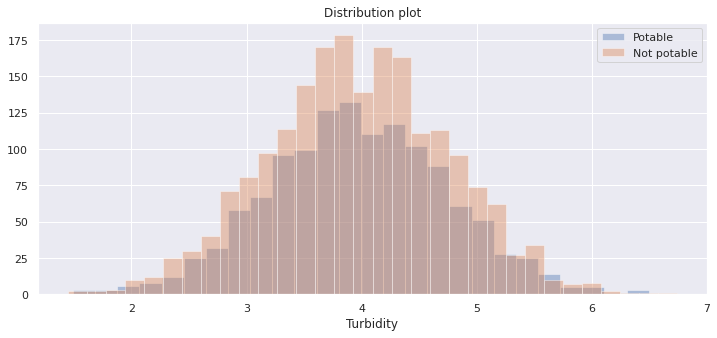

In [ ]:
sns.set(rc={'figure.figsize':(12,5)})
sns.distplot(data[data["Potability"] == 1]['Turbidity'],  kde=False, label="Potable").set(title='Distribution plot')
sns.distplot(data[data["Potability"] == 0]['Turbidity'],  kde=False, label="Not potable")
plt.legend()

In [ ]:
new_data=data.copy()

In [ ]:

new_data["ph"]=np.nan_to_num(new_data["ph"],nan=new_data["ph"].mean())
new_data["Sulfate"]=np.nan_to_num(new_data["Sulfate"],nan=new_data["Sulfate"].mean())
new_data["Trihalomethanes"]=np.nan_to_num(new_data["Trihalomethanes"],nan=new_data["Trihalomethanes"].mean())

new_data.head(-10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3261,3.629922,244.187392,24856.633209,6.618071,366.967873,442.076337,13.302880,59.489294,4.754826,1
3262,8.378108,198.511213,28474.202580,6.477057,319.477187,499.866994,15.389083,35.221200,4.524693,1
3263,6.923636,260.593154,24792.525623,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
3264,5.893103,239.269481,20526.666156,6.349561,341.256362,403.617560,18.963707,63.846319,4.390702,1


In [ ]:
#6.5 < ph < 9 | Solids < 1000 | Chloramines! < 4 | Sulfate < 500 | Conductivity < 400 | Organic_carbon! < 4 | Trihalomethanes < 80 | Turbidity < 5
# new_data.loc[new_data["ph"]<9].loc[new_data["ph"]>6.5]
# new_data[new_data["ph"]<9][new_data["ph"]>6.5]["Potability"].replace(0,1)
# new_data.head()
# new_data.where((new_data['ph'] <=9) & (new_data['ph'] > 6.5))["Potability"].replace(0,1)
new_data["Solids"]=new_data["Solids"].divide(25)
new_data["Chloramines"]=new_data["Chloramines"].divide(2)
new_data["Organic_carbon"]=new_data["Organic_carbon"].divide(4)


new_data
# new_data
# new_data



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,831.652759,3.650106,368.516441,564.308654,2.594946,86.990970,2.963135,0
1,3.716080,129.422921,745.202314,3.317623,333.775777,592.885359,3.795003,56.329076,4.500656,0
2,8.099124,224.236259,796.381669,4.637942,333.775777,418.606213,4.217159,66.420093,3.055934,0
3,8.316766,214.373394,880.736698,4.029666,356.886136,363.266516,4.609131,100.341674,4.628771,0
4,9.092223,181.101509,719.159454,3.273300,310.135738,398.410813,2.889570,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,1903.239664,3.583319,359.948574,526.424171,3.473605,66.687695,4.435821,1
3272,7.808856,193.553212,693.192086,4.030681,333.775777,392.449580,4.975806,66.396293,2.798243,1
3273,9.419510,175.762646,1326.223129,3.675117,333.775777,432.044783,2.759767,69.845400,3.298875,1
3274,5.126763,230.603758,479.354775,3.151678,333.775777,402.883113,2.792237,77.488213,4.708658,1


In [ ]:
condition = (new_data['ph'] <9) & (new_data['ph'] >6.5) & (new_data['Solids'] <1000) & (new_data['Chloramines'] <4) & (new_data['Sulfate'] <500) & (new_data['Conductivity'] <400) & (new_data['Organic_carbon'] <4) & (new_data['Trihalomethanes'] <80) & (new_data['Turbidity'] <5)
condition1 = (new_data['ph'] >9) | (new_data['ph'] <6.5) | (new_data['Solids'] >1000) | (new_data['Chloramines'] >4) | (new_data['Sulfate'] >500) | (new_data['Conductivity'] >400) | (new_data['Organic_carbon'] >4) | (new_data['Trihalomethanes'] >80) | (new_data['Turbidity'] >5)
new_data.loc[condition, "Potability"] = 1
new_data.loc[condition1, "Potability"] = 0

In [ ]:
new_data["Potability"].sum()

183

In [ ]:
y=new_data["Potability"]
X=new_data.drop('Potability',axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=88)


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



## **5.Izbor modela trening i validacija.**

U ovom delu fitujem nove podatke u modele bez optimizacije hiperparametara(osim scalera).<br>
Sistem masinskog ucenja odmah pokazuje bolje rezultate kada radi na podacima koji nisu nasumicni.


In [ ]:
lr=LogisticRegression(solver="lbfgs")
lr.fit(X_train,y_train)
rc=RidgeClassifier()
rc.fit(X_train,y_train)

RidgeClassifier()

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_lr_prob=lr.predict_proba(X_test)
y_pred_rc=rc.predict(X_test)


In [ ]:

acc_lr_test=accuracy_score(y_test,y_pred_lr)
roc_lr_test=roc_auc_score(y_test,y_pred_lr_prob[:,1])
prec_lr_test=precision_score(y_test,y_pred_lr)
recall_lr_test=recall_score(y_test,y_pred_lr)

print("ACC:{} \nAUC:{} \nPrecision:{} \nRecall{} ".format(acc_lr_test,roc_lr_test,prec_lr_test,recall_lr_test))

ACC:0.9420731707317073 
AUC:0.8590103900528019 
Precision:0.0 
Recall0.0 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc_rc_test=accuracy_score(y_test,y_pred_rc)
print("ACC:",acc_rc_test)

ACC: 0.9420731707317073


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


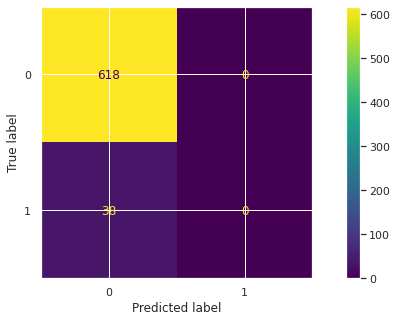

In [ ]:
plot_confusion_matrix(lr,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


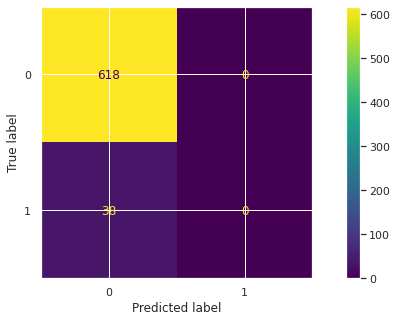

In [ ]:
plot_confusion_matrix(rc,X_test,y_test)

# U ovom delu testiram preformanse raznih modela masinskog ucenja.
# AdaBoost se pokazao kao najbolji
Da se ne bi trosilo vreme svaki put kada se pokrene program zakomentirao sam ovaj deo

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [ ]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [ ]:
scoreFrame = pd.DataFrame()
scoreFrame['name'] = names
scoreFrame['score'] = scores
scoreFrame

,name,score
0,Nearest_Neighbors,0.932927
1,Linear_SVM,0.942073
2,Polynomial_SVM,0.942073
3,RBF_SVM,0.942073
4,Gaussian_Process,0.951220
5,Gradient_Boosting,0.931402
6,Decision_Tree,0.946646
7,Extra_Trees,0.946646
8,Random_Forest,0.942073
9,Neural_Net,0.942073


## **6.Testiranje/Optimizacija hiperparametara**
Ovaj deo se bavi optimizacijom hiperparametara i testiranjem modela.
Za sada se AdaBoost pokazao kao najbolji klasifikator
Uporedicemo ga sa Logistickom regresijom i Ridge Klasifikatorom.

In [ ]:

params=[{'C':[0.001,0.01,0.1,1],'penalty':['none','l1','l2']}]
logreg=LogisticRegression(class_weight='balanced',solver='lbfgs')
grid=GridSearchCV(logreg,params,cv=5,scoring='roc_auc')
grid.fit(X_train,y_train)

params2=[{'alpha':[0.001,0.01,0.1,1]}]
ridgereg=RidgeClassifier()
grid2=GridSearchCV(ridgereg,params2,cv=5,scoring='roc_auc')
grid2.fit(X_train,y_train)

params3=[{"n_estimators":[50,100,200]}]
adaBoost=AdaBoostClassifier(n_estimators=100)
grid3=GridSearchCV(adaBoost,params3,cv=5,scoring="roc_auc")
grid3.fit(X_train,y_train)

print("Najbolje vrednosti parametara: ",grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print("Najbolje vrednosti parametara: ",grid2.best_params_)
print(grid2.cv_results_['mean_test_score'])
print("Najbolje vrednosti parametara: ",grid3.best_params_)
print(grid3.cv_results_['mean_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

Najbolje vrednosti parametara:  {'C': 0.001, 'penalty': 'none'}
[0.9082689         nan 0.90665273 0.9082689         nan 0.90707071
 0.9082689         nan 0.90785092 0.9082689         nan 0.90797631]
Najbolje vrednosti parametara:  {'alpha': 1}
[0.90463253 0.90463253 0.90467433 0.90498084]
Najbolje vrednosti parametara:  {'n_estimators': 100}
[0.99343783 0.99467781 0.9933403 ]


0.7820121951219512
0.9420731707317073
0.9984756097560976


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

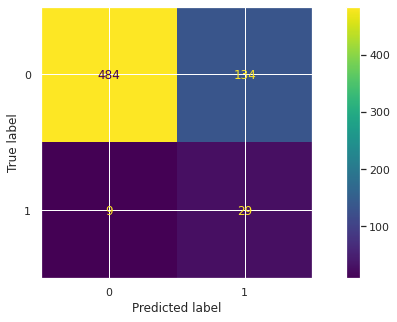

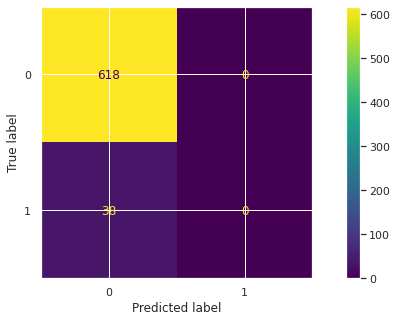

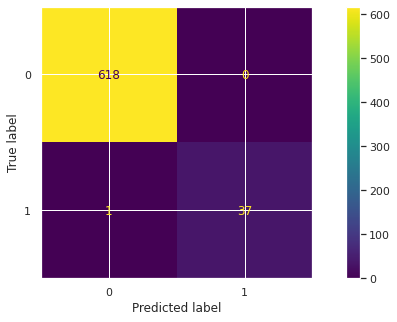

In [ ]:
grid_test=grid.predict(X_test)
grid_test_proba=grid.predict_proba(X_test)
acc_lr_test=accuracy_score(y_test,grid_test)
print(acc_lr_test)
plot_confusion_matrix(grid,X_test,y_test)

grid2_test=grid2.predict(X_test)
# grid2_test_proba=grid2.predict_proba(X_test)
acc_rc_test=accuracy_score(y_test,grid2_test)
print(acc_rc_test)
plot_confusion_matrix(grid2,X_test,y_test)

grid3_test=grid3.predict(X_test)
grid3_test_proba=grid3.predict_proba(X_test)
acc_ab_test=accuracy_score(y_test,grid3_test)
print(acc_ab_test)
plot_confusion_matrix(grid3,X_test,y_test)

## **7. Selekcija atributa**
Smatram da u ovom projektu ne smemo da izbacujemo atribute jer svaki moze da govori o tome da voda nije za pice, osim kolicine cvrste materije.<br>
Zato cu redukovati tu kolonu koristeci SelectKBest Metod.<br>
Ako bih izabrao samo 6 kolona onda bi mi se preformanse znatno smanjile na AdaBoost.

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
mutual_info_classif(X_train,y_train)


array([0.02651061, 0.00427659, 0.02592965, 0.01349578, 0.        ,
       0.04738041, 0.02621165, 0.01271792, 0.00535151])

In [ ]:
best=SelectKBest(k=6,score_func=mutual_info_classif)
best.fit(X_train,y_train)
best.scores_


array([0.02878078, 0.00427659, 0.02592965, 0.01349578, 0.        ,
       0.04738041, 0.02621165, 0.0119227 , 0.00535151])

In [ ]:
best.get_support()

array([ True, False,  True,  True, False,  True,  True,  True, False])

In [ ]:
X_reduced_train=pd.DataFrame(best.transform(X_train),columns=X_train[0,best.get_support()])
X_reduced_test=pd.DataFrame(best.transform(X_test),columns=X_test[0,best.get_support()])
print(X_reduced_train)

      0.497607  0.366478  0.413232  0.511177  0.416968  0.505404
0     0.497607  0.366478  0.413232  0.511177  0.416968  0.505404
1     0.497607  0.142415  0.430984  0.325091  0.449731  0.714202
2     0.490516  0.277273  0.508173  0.000000  0.360090  0.578409
3     0.327385  0.462326  0.376371  0.572408  0.454526  0.522604
4     0.580945  0.287666  0.490738  0.679278  0.494994  0.508037
...        ...       ...       ...       ...       ...       ...
2615  0.629968  0.208117  0.399832  0.237586  0.572037  0.492372
2616  0.482770  0.351253  0.404886  0.293258  0.281676  0.549016
2617  0.276211  0.237636  0.607341  0.282404  0.444690  0.689110
2618  0.745198  0.518415  0.960299  0.388803  0.324284  0.707884
2619  0.401450  0.121624  0.537784  0.456887  0.351140  0.772018

[2620 rows x 6 columns]


In [ ]:

params=[{'C':[0.001,0.01,0.1,1],'penalty':['none','l1','l2']}]
logreg=LogisticRegression(class_weight='balanced',solver='lbfgs')
grid=GridSearchCV(logreg,params,cv=5,scoring='roc_auc')
grid.fit(X_reduced_train,y_train)

params2=[{'alpha':[0.001,0.01,0.1,1]}]
ridgereg=RidgeClassifier()
grid2=GridSearchCV(ridgereg,params2,cv=5,scoring='roc_auc')
grid2.fit(X_reduced_train,y_train)

params3=[{"n_estimators":[50,100,200]}]
adaBoost=AdaBoostClassifier(n_estimators=100)
grid3=GridSearchCV(adaBoost,params3,cv=5,scoring="roc_auc")
grid3.fit(X_reduced_train,y_train)

print("Najbolje vrednosti parametara: ",grid.best_params_)
print(grid.cv_results_['mean_test_score'])
print("Najbolje vrednosti parametara: ",grid2.best_params_)
print(grid2.cv_results_['mean_test_score'])
print("Najbolje vrednosti parametara: ",grid3.best_params_)
print(grid3.cv_results_['mean_test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureW

Najbolje vrednosti parametara:  {'C': 1, 'penalty': 'l2'}
[0.90571926        nan 0.90496691 0.90571926        nan 0.90502264
 0.90571926        nan 0.90553814 0.90571926        nan 0.90627656]
Najbolje vrednosti parametara:  {'alpha': 1}
[0.90375479 0.90375479 0.90376872 0.90399164]
Najbolje vrednosti parametara:  {'n_estimators': 200}
[0.99086033 0.991752   0.99318704]


0.7911585365853658
0.9420731707317073


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names

0.9862804878048781


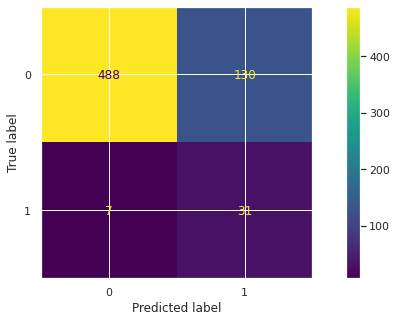

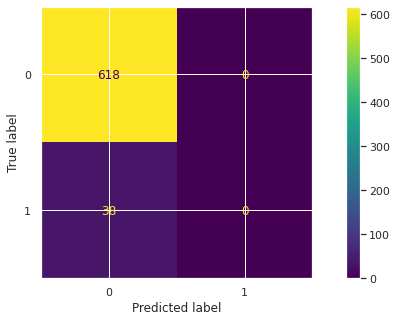

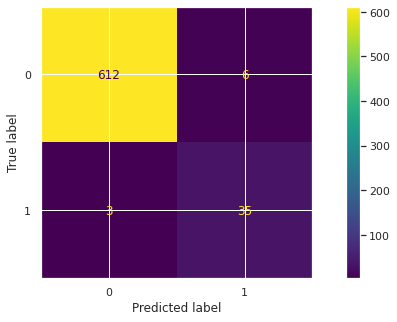

In [ ]:
grid_test=grid.predict(X_reduced_test)
grid_test_proba=grid.predict_proba(X_reduced_test)
acc_lr_test=accuracy_score(y_test,grid_test)
print(acc_lr_test)
plot_confusion_matrix(grid,X_reduced_test,y_test)

grid2_test=grid2.predict(X_reduced_test)
# grid2_test_proba=grid2.predict_proba(X_test)
acc_rc_test=accuracy_score(y_test,grid2_test)
print(acc_rc_test)
plot_confusion_matrix(grid2,X_reduced_test,y_test)

grid3_test=grid3.predict(X_reduced_test)
grid3_test_proba=grid3.predict_proba(X_reduced_test)
acc_ab_test=accuracy_score(y_test,grid3_test)
print(acc_ab_test)
plot_confusion_matrix(grid3,X_reduced_test,y_test)